In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
podcastAna = pd.read_csv('DataBases/chartablePodcast.csv', delimiter=',')
podcastAna

,creator,name,num_ratings,rating
0,audiochuck,Crime Junkie,295124.0,4.8
1,The Daily Wire,The Matt Walsh Show,9337.0,4.8
2,NaN,百靈果NEWS,1272.0,4.8
3,Pushkin Industries,The Happiness Lab with Dr. Laurie Santos,15328.0,4.8
4,NaN,Get Sleepy,6258.0,4.6
...,...,...,...,...
195,Team Coco & Earwolf,Conan O’Brien Needs A Friend,53536.0,4.8
196,Westwood One Podcast Network / Dan Bongino,The Dan Bongino Show,40938.0,4.7
197,Earwolf & Jenna Fischer and Angela Kinsey,Office Ladies,80222.0,4.8
198,NBC News,Dateline NBC,21135.0,4.5


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_ratings', ylabel='rating'>

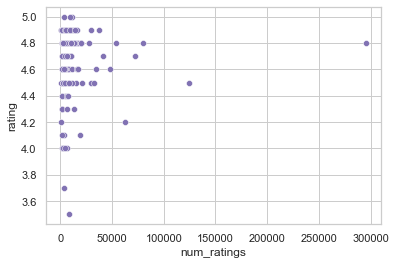

In [14]:
sns.scatterplot(podcastAna['num_ratings'], podcastAna['rating'],color="m")


In [51]:
podcastAna_network = podcastAna.groupby('creator', group_keys=False).agg('mean').reset_index().sort_values(by='rating', ascending = False)
podcastAna_network

,creator,num_ratings,rating
73,Team Coco & Nicole Byer,14144.0,4.9
77,The Roost x Sweet Boys,4921.0,4.9
37,Headgum / Doughboys Media,4252.0,4.9
33,Forever Dog,10864.0,4.9
35,Fréquence Moderne,4500.0,4.9
...,...,...,...
40,"Joe Scarborough and Mika Brzezinski, MSNBC",6995.0,4.0
94,iHeartRadio,2852.0,4.0
15,"Chuck Todd, Meet the Press",1977.0,4.0
16,"Chuck Todd, NBC News",3421.0,3.7


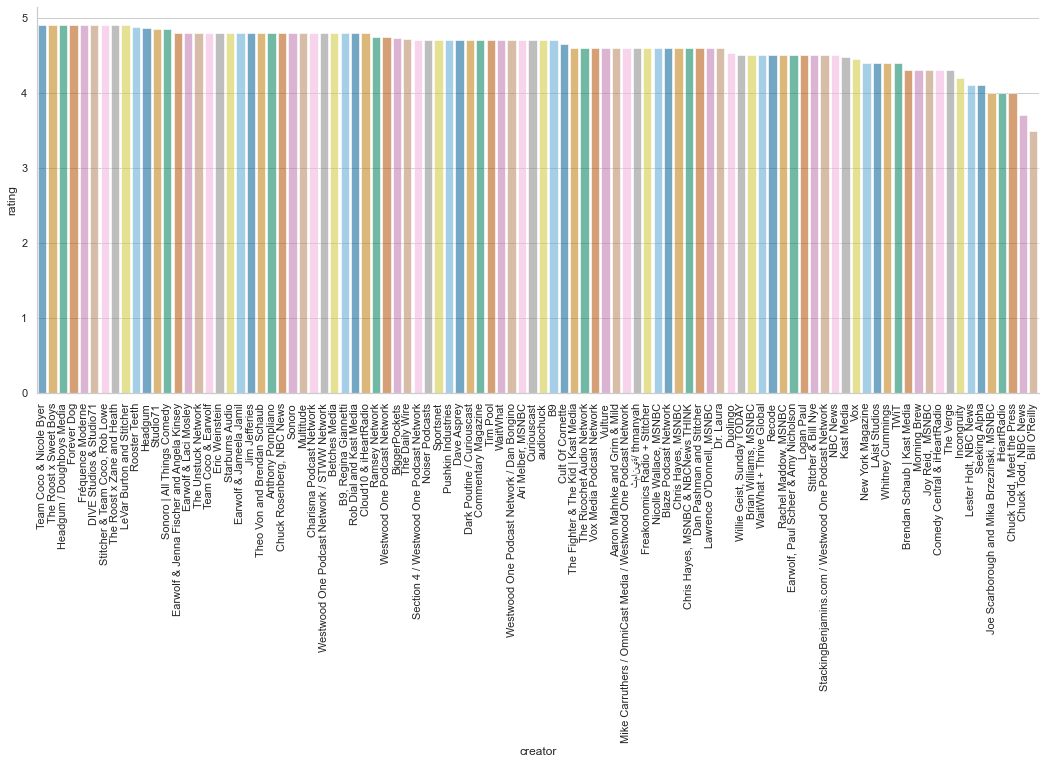

In [52]:
sns.set_theme(style="whitegrid")


sns.catplot(
    data=podcastAna_network, kind="bar",
    x="creator", y="rating", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90)


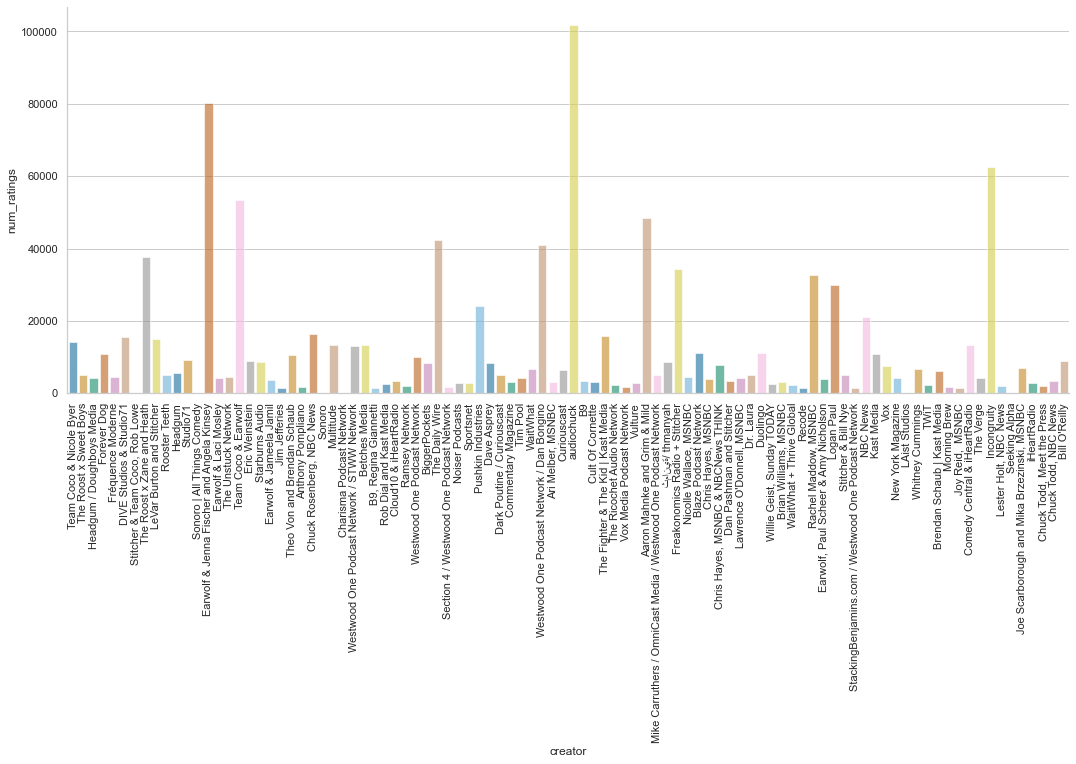

In [55]:
sns.set_theme(style="whitegrid")
podcastAna_network2 = podcastAna_network


sns.catplot(
    data=podcastAna_network2, kind="bar",
    x="creator", y="num_ratings", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90)


In [64]:
podcastAna_network3 = podcastAna.groupby('creator', group_keys=False).agg('count').reset_index().sort_values(by='name', ascending = False)[['creator','name']]
podcastAna_network3

,creator,name
60,Rooster Teeth,6
88,Westwood One Podcast Network,5
55,Pushkin Industries,5
83,Vox,4
74,The Daily Wire,4
...,...,...
33,Forever Dog,1
32,Eric Weinstein,1
31,"Earwolf, Paul Scheer & Amy Nicholson",1
30,Earwolf & Laci Mosley,1


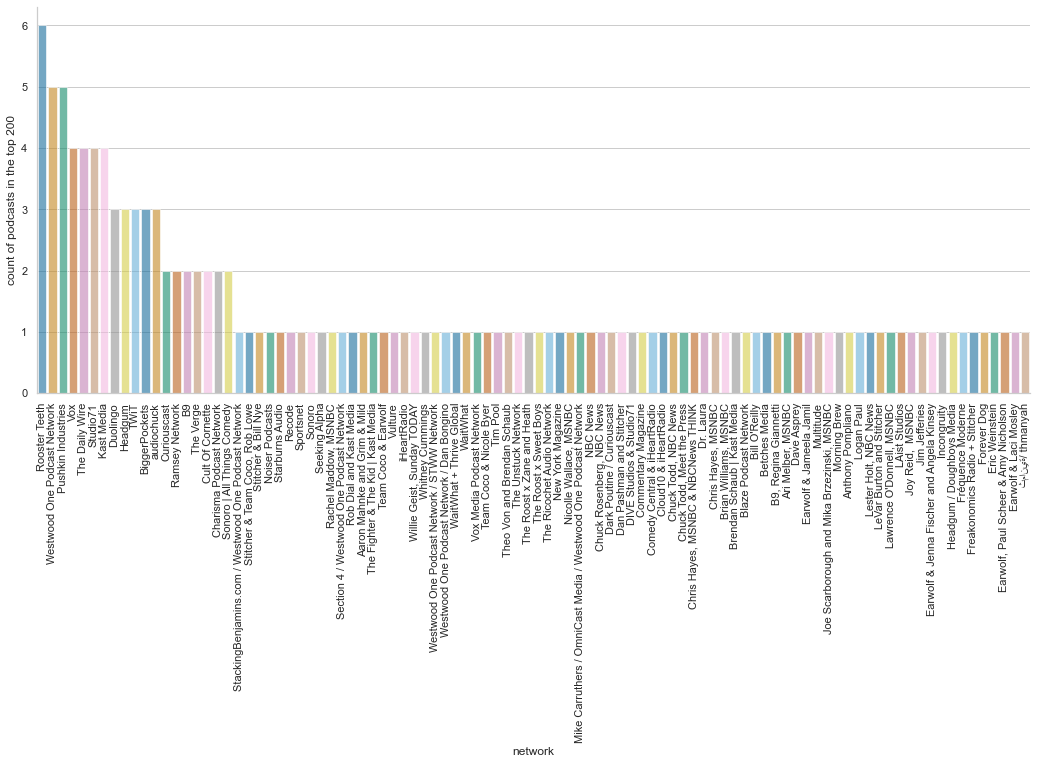

In [66]:
sns.set_theme(style="whitegrid")


sns.catplot(
    data=podcastAna_network3, kind="bar",
    x="creator", y="name", palette="colorblind", alpha=.6, height=6, aspect=22/8.27).set_xticklabels(rotation=90).set_axis_labels("network", "count of podcasts in the top 200")
